<a href="https://colab.research.google.com/github/palswayam5/Review_classifier_aries/blob/master/review_classsifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('amazon_reviews.csv')
df2 = pd.read_csv('Dataset-SA.csv')

In [3]:
df1.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [4]:
df1_train = df1.drop(['reviewerName','reviewTime','day_diff','helpful_yes','helpful_no','total_vote','score_pos_neg_diff','score_average_rating','wilson_lower_bound'],axis = 1)

In [5]:
df1_train.head()

,Unnamed: 0,overall,reviewText
0,0,4.0,No issues.
1,1,5.0,"Purchased this for my device, it worked as adv..."
2,2,4.0,it works as expected. I should have sprung for...
3,3,5.0,This think has worked out great.Had a diff. br...
4,4,5.0,"Bought it with Retail Packaging, arrived legit..."


In [6]:
df1_train['overall'].value_counts()

5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

In [7]:
arr = []
for i in df1_train['overall']:
  if i<3:
    arr.append(-1)
  else:
    arr.append(1)

In [8]:
print(arr)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1,

In [9]:
arr = np.array(arr)
arr.shape

(4915,)

In [10]:
arr = arr.reshape(-1,1)
arr.shape

(4915, 1)

In [11]:
df1_train['review_type'] = arr
df1_train.head()

,Unnamed: 0,overall,reviewText,review_type
0,0,4.0,No issues.,1
1,1,5.0,"Purchased this for my device, it worked as adv...",1
2,2,4.0,it works as expected. I should have sprung for...,1
3,3,5.0,This think has worked out great.Had a diff. br...,1
4,4,5.0,"Bought it with Retail Packaging, arrived legit...",1


In [12]:
df1_train.drop(['overall'],axis = 1,inplace = True)
df1_train.head()

,Unnamed: 0,reviewText,review_type
0,0,No issues.,1
1,1,"Purchased this for my device, it worked as adv...",1
2,2,it works as expected. I should have sprung for...,1
3,3,This think has worked out great.Had a diff. br...,1
4,4,"Bought it with Retail Packaging, arrived legit...",1


In [13]:
df1_train.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [14]:
df1_train.head()

,reviewText,review_type
0,No issues.,1
1,"Purchased this for my device, it worked as adv...",1
2,it works as expected. I should have sprung for...,1
3,This think has worked out great.Had a diff. br...,1
4,"Bought it with Retail Packaging, arrived legit...",1


In [15]:
df1_train['review_type'].isnull().sum()

0

hence no null values in the data

In [16]:
df1_train['review_type'].value_counts()

 1    4591
-1     324
Name: review_type, dtype: int64

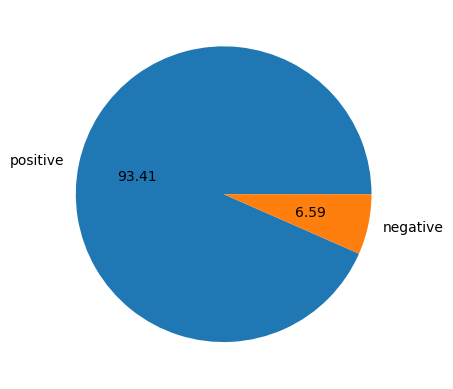

In [17]:
import matplotlib.pyplot as plt
plt.pie(df1_train['review_type'].value_counts(),labels = ['positive','negative'],autopct="%0.2f")
plt.show()

Highly skewed data
hence need to add some negative reviews to balance the data

In [18]:
df2.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [19]:
df2.drop(['product_name','product_price'],inplace = True, axis = 1)
df2.head()

,Rate,Review,Summary,Sentiment
0,5,super!,great cooler excellent air flow and for this p...,positive
1,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3,fair,the quality is good but the power of air is de...,positive
3,1,useless product,very bad product its a only a fan,negative
4,3,fair,ok ok product,neutral


In [20]:
df2['Review'].value_counts()

wonderful                                     9016
not specified                                 8351
brilliant                                     5643
awesome                                       5636
great product                                 5622
                                              ... 
nice to see this product in very less rate       1
best deal in market !!                           1
amazing good for its price                       1
amazing product for its price!!!                 1
product looking very nice & strong quality       1
Name: Review, Length: 1324, dtype: int64

In [21]:
df2.drop('Review',inplace = True,axis = 1)

In [22]:
df2.head()

,Rate,Summary,Sentiment
0,5,great cooler excellent air flow and for this p...,positive
1,5,best budget 2 fit cooler nice cooling,positive
2,3,the quality is good but the power of air is de...,positive
3,1,very bad product its a only a fan,negative
4,3,ok ok product,neutral


In [23]:
arr = []
for i in df2['Sentiment']:
  if i=='positive':
    arr.append(1)
  elif i=='negative':
    arr.append(-1)
  else :
    arr.append(0)
arr = np.array(arr)
arr.reshape(-1,1)
df2['Sentiment'] = arr

In [24]:
df2.head()

,Rate,Summary,Sentiment
0,5,great cooler excellent air flow and for this p...,1
1,5,best budget 2 fit cooler nice cooling,1
2,3,the quality is good but the power of air is de...,1
3,1,very bad product its a only a fan,-1
4,3,ok ok product,0


In [25]:
df2['Sentiment'].value_counts()

 1    166581
-1     28232
 0     10239
Name: Sentiment, dtype: int64

In [28]:
negative_sentiments = df2[df2['Sentiment'] == -1]
negative_sentiments.head()

,Rate,Summary,Sentiment
3,1,very bad product its a only a fan,-1
8,1,very bad cooler,-1
32,2,bad quality,-1
48,1,small wire and moter capacity is very low fan ...,-1
53,3,received dalay 10 days cooler is ok when i was...,-1


In [29]:
df2['Sentiment'][0]

1

In [32]:
index = 0
for i in df2['Sentiment']:
  if i==0:
    df2['Sentiment'][index] = 1 #converting all neutral reviws to positive reviews
  index+=1
df2['Sentiment'].value_counts()


 1    176820
-1     28232
Name: Sentiment, dtype: int64

In [34]:
positive_sentiments = df2[df2['Sentiment'] == 1]
positive_sentiments.head()

,Rate,Summary,Sentiment
0,5,great cooler excellent air flow and for this p...,1
1,5,best budget 2 fit cooler nice cooling,1
2,3,the quality is good but the power of air is de...,1
4,3,ok ok product,1
5,5,the cooler is really fantastic and provides go...,1


In [35]:
negative_sentiments.drop('Rate',axis = 1,inplace = True)
positive_sentiments.drop('Rate',axis = 1,inplace = True)

<ipython-input-35-19194033999f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiments.drop('Rate',axis = 1,inplace = True)
<ipython-input-35-19194033999f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentiments.drop('Rate',axis = 1,inplace = True)


In [36]:
positive_sentiments.head()

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,1
1,best budget 2 fit cooler nice cooling,1
2,the quality is good but the power of air is de...,1
4,ok ok product,1
5,the cooler is really fantastic and provides go...,1


In [37]:
positive_sentiments1 = positive_sentiments[0:24000]
positive_sentiments1.head()

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,1
1,best budget 2 fit cooler nice cooling,1
2,the quality is good but the power of air is de...,1
4,ok ok product,1
5,the cooler is really fantastic and provides go...,1


In [38]:
positive_sentiments1.shape

(24000, 2)

In [47]:
positive_sentiments1.rename(columns = {'Summary':'reviewText','Sentiment':'review_type'},inplace = True)
negative_sentiments.rename(columns = {'Summary':'reviewText','Sentiment':'review_type'},inplace = True)

<ipython-input-47-643477fef078>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentiments1.rename(columns = {'Summary':'reviewText','Sentiment':'review_type'},inplace = True)
<ipython-input-47-643477fef078>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiments.rename(columns = {'Summary':'reviewText','Sentiment':'review_type'},inplace = True)


In [48]:
df1_train.shape

(4915, 2)

In [49]:
df_train = pd.concat([df1_train,positive_sentiments1,negative_sentiments],axis = 0)

In [50]:
df_train.shape

(57147, 2)

In [51]:
df_train.head()

,reviewText,review_type
0,No issues.,1
1,"Purchased this for my device, it worked as adv...",1
2,it works as expected. I should have sprung for...,1
3,This think has worked out great.Had a diff. br...,1
4,"Bought it with Retail Packaging, arrived legit...",1


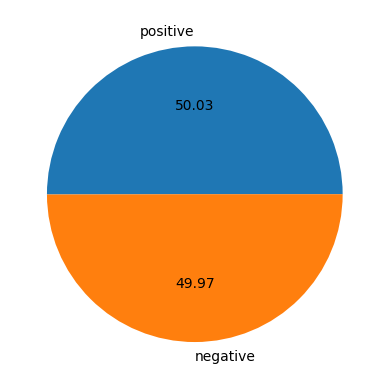

In [53]:
plt.pie(df_train['review_type'].value_counts(),labels = ['positive','negative'],autopct="%0.2f")
plt.show()

will be working over unskewed data now

In [54]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
df_train['num_charachters'] = df_train['reviewText'].apply(len)
df_train['num_words'] = df_train['reviewText'].apply(lambda x:len(nltk.word_tokenize(x)))
df_train['num_sentences'] = df_train['reviewText'].apply(lambda x:len(nltk.sent_tokenize(x)))

TypeError: ignored

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
from nltk.corpus import  stopwords
import string
from nltk.stem import PorterStemmer


def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum:
      y.append(i)
  
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  
  text = y[:]
  y.clear()
  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y) 

In [64]:
df_train.describe()

,review_type
count,57147.000000
mean,0.000612
std,1.000009
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [65]:
df_train.columns

Index(['reviewText', 'review_type'], dtype='object')

In [66]:
df_train['reviewText'].dtype

dtype('O')

In [69]:
df_train.reviewText=df_train.reviewText.astype(str)

In [70]:
df_train['transformed_text'] = df_train['reviewText'].apply(transform_text)

In [71]:
df_train.head()

,reviewText,review_type,transformed_text
0,No issues.,1,issu
1,"Purchased this for my device, it worked as adv...",1,purchas devic work advertis never much phone m...
2,it works as expected. I should have sprung for...,1,work expect sprung higher capac think made bit...
3,This think has worked out great.Had a diff. br...,1,think work great.had diff bran 64gb card went ...
4,"Bought it with Retail Packaging, arrived legit...",1,bought retail packag arriv legit orang envelop...


In [73]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
positive = wc.generate(df_train[df_train['review_type']==1]['transformed_text'].str.cat(sep = " "))
negative = wc.generate(df_train[df_train['review_type']==-1]['transformed_text'].str.cat(sep = " "))

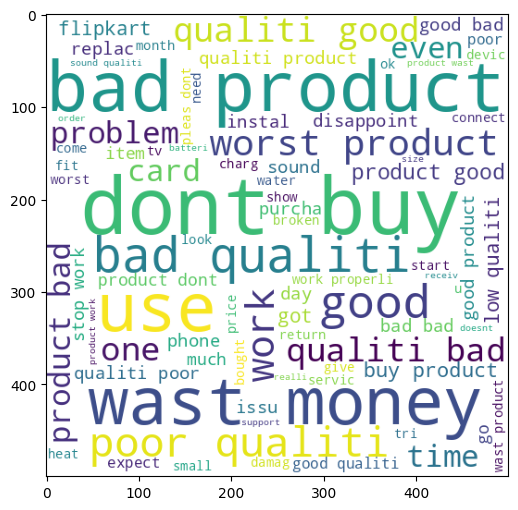

In [74]:
plt.figure(figsize=(15,6))
plt.imshow(positive)

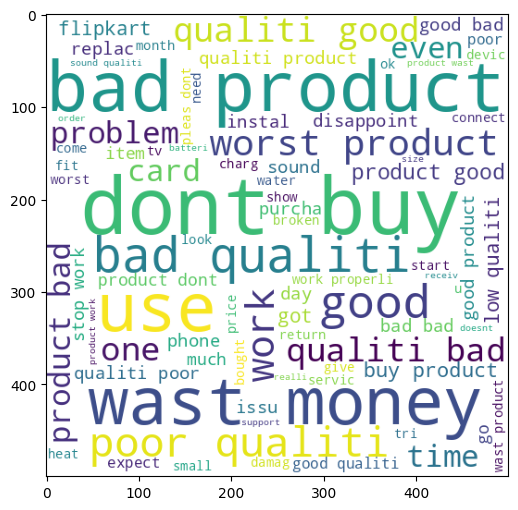

In [75]:
plt.figure(figsize=(15,6))
plt.imshow(negative)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features = 10625)
tfidf = TfidfVectorizer(max_features=3000)

In [78]:
X = cv.fit_transform(df_train['transformed_text']).toarray()

In [79]:
X.shape

(57147, 10625)

In [81]:
y = df_train['review_type'].values

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [83]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [84]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6018372703412074
[[5428  280]
 [4271 1451]]
0.8382437897169266


In [85]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.883814523184602
[[4891  817]
 [ 511 5211]]
0.8644658261446583


In [86]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8140857392825896
[[5295  413]
 [1712 4010]]
0.9066244630341397


now start deep learning work